In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("creditcard.csv")

### Vista previa del dataset

In [67]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Tenemos 492 fraudes en total en el dataset, marcando un cierto desbalanceo

In [68]:
print("Fraudes",df["Class"].value_counts()[0],"representando un", round(df["Class"].value_counts()[0]/len(df) * 100,2), "% del dataset")
print("No Fraudes",df["Class"].value_counts()[1],"representando un", round(df["Class"].value_counts()[1]/len(df) * 100,2), "% del dataset")


Fraudes 284315 representando un 99.83 % del dataset
No Fraudes 492 representando un 0.17 % del dataset


### Descripcion de las variables, que nos servira por ejemplo para analizar si existe una diferencia considerable entre el maximo y minimo de una de ellas y aplicar un normalizado.


In [69]:
#Descripción
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Como podemos ver en la descripción, el valor maximo y minimo de las variables Time y Amount difieren mucho en su escalado

In [70]:
amount_val = df["Amount"].values
time_val = df["Time"].values

C:\Users\Manjul\AppData\Local\Temp\ipykernel_11752\2400097157.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color="r")


(0.0, 172792.0)

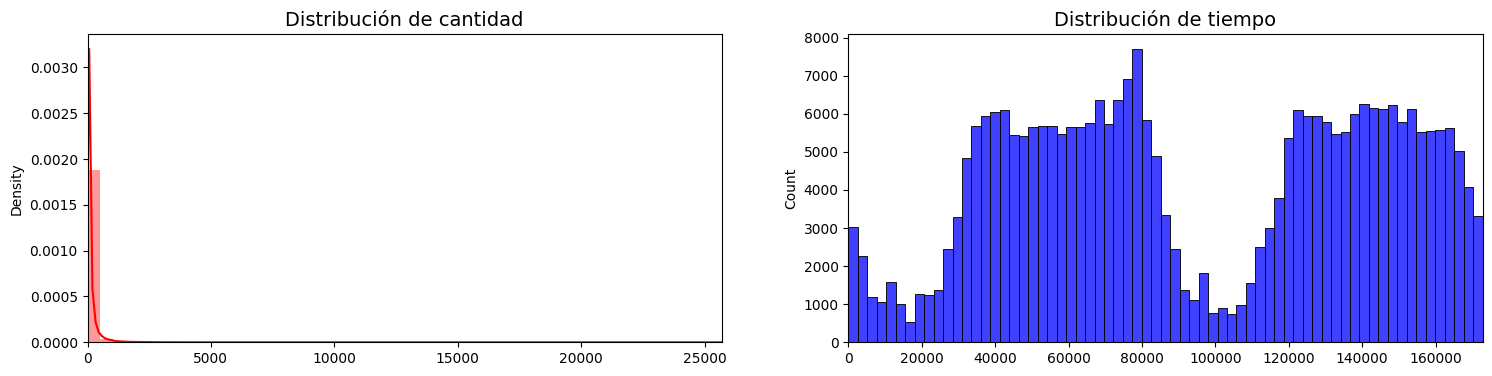

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.distplot(amount_val, ax=ax[0], color="r")
ax[0].set_title("Distribución de cantidad", fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color="b")
ax[1].set_title("Distribución de tiempo", fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

#### Generamos un escalado a las variables analizadas

In [72]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df["Amount"] = rob_scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df["Time"] = rob_scaler.fit_transform(df["Time"].values.reshape(-1,1))

#### Verificación de NO nulos

In [73]:
#Deteccion Nulos
df.isnull().sum().max()


0

#### División del modelo en 3 subconjuntos. Con el stratify buscon una homogeneidad en la division de los datos. La idea es que los 3 subconjuntos tengan datos con similares caracteristicas.

In [78]:
from sklearn.model_selection import train_test_split
#Division del conjunto de datos para realizar las pruebas
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [79]:
print("Longitud del conjunto de datos:", len(df))

Longitud del conjunto de datos: 284807


In [80]:
train_set, val_set, test_set = train_val_test_split(df)

In [81]:
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 170884
Longitud del Validation Set: 56961
Longitud del Test Set: 56962


#### Entendimiento a partir de la correlacion entre la variables independiente y las dependientes

<Axes: >

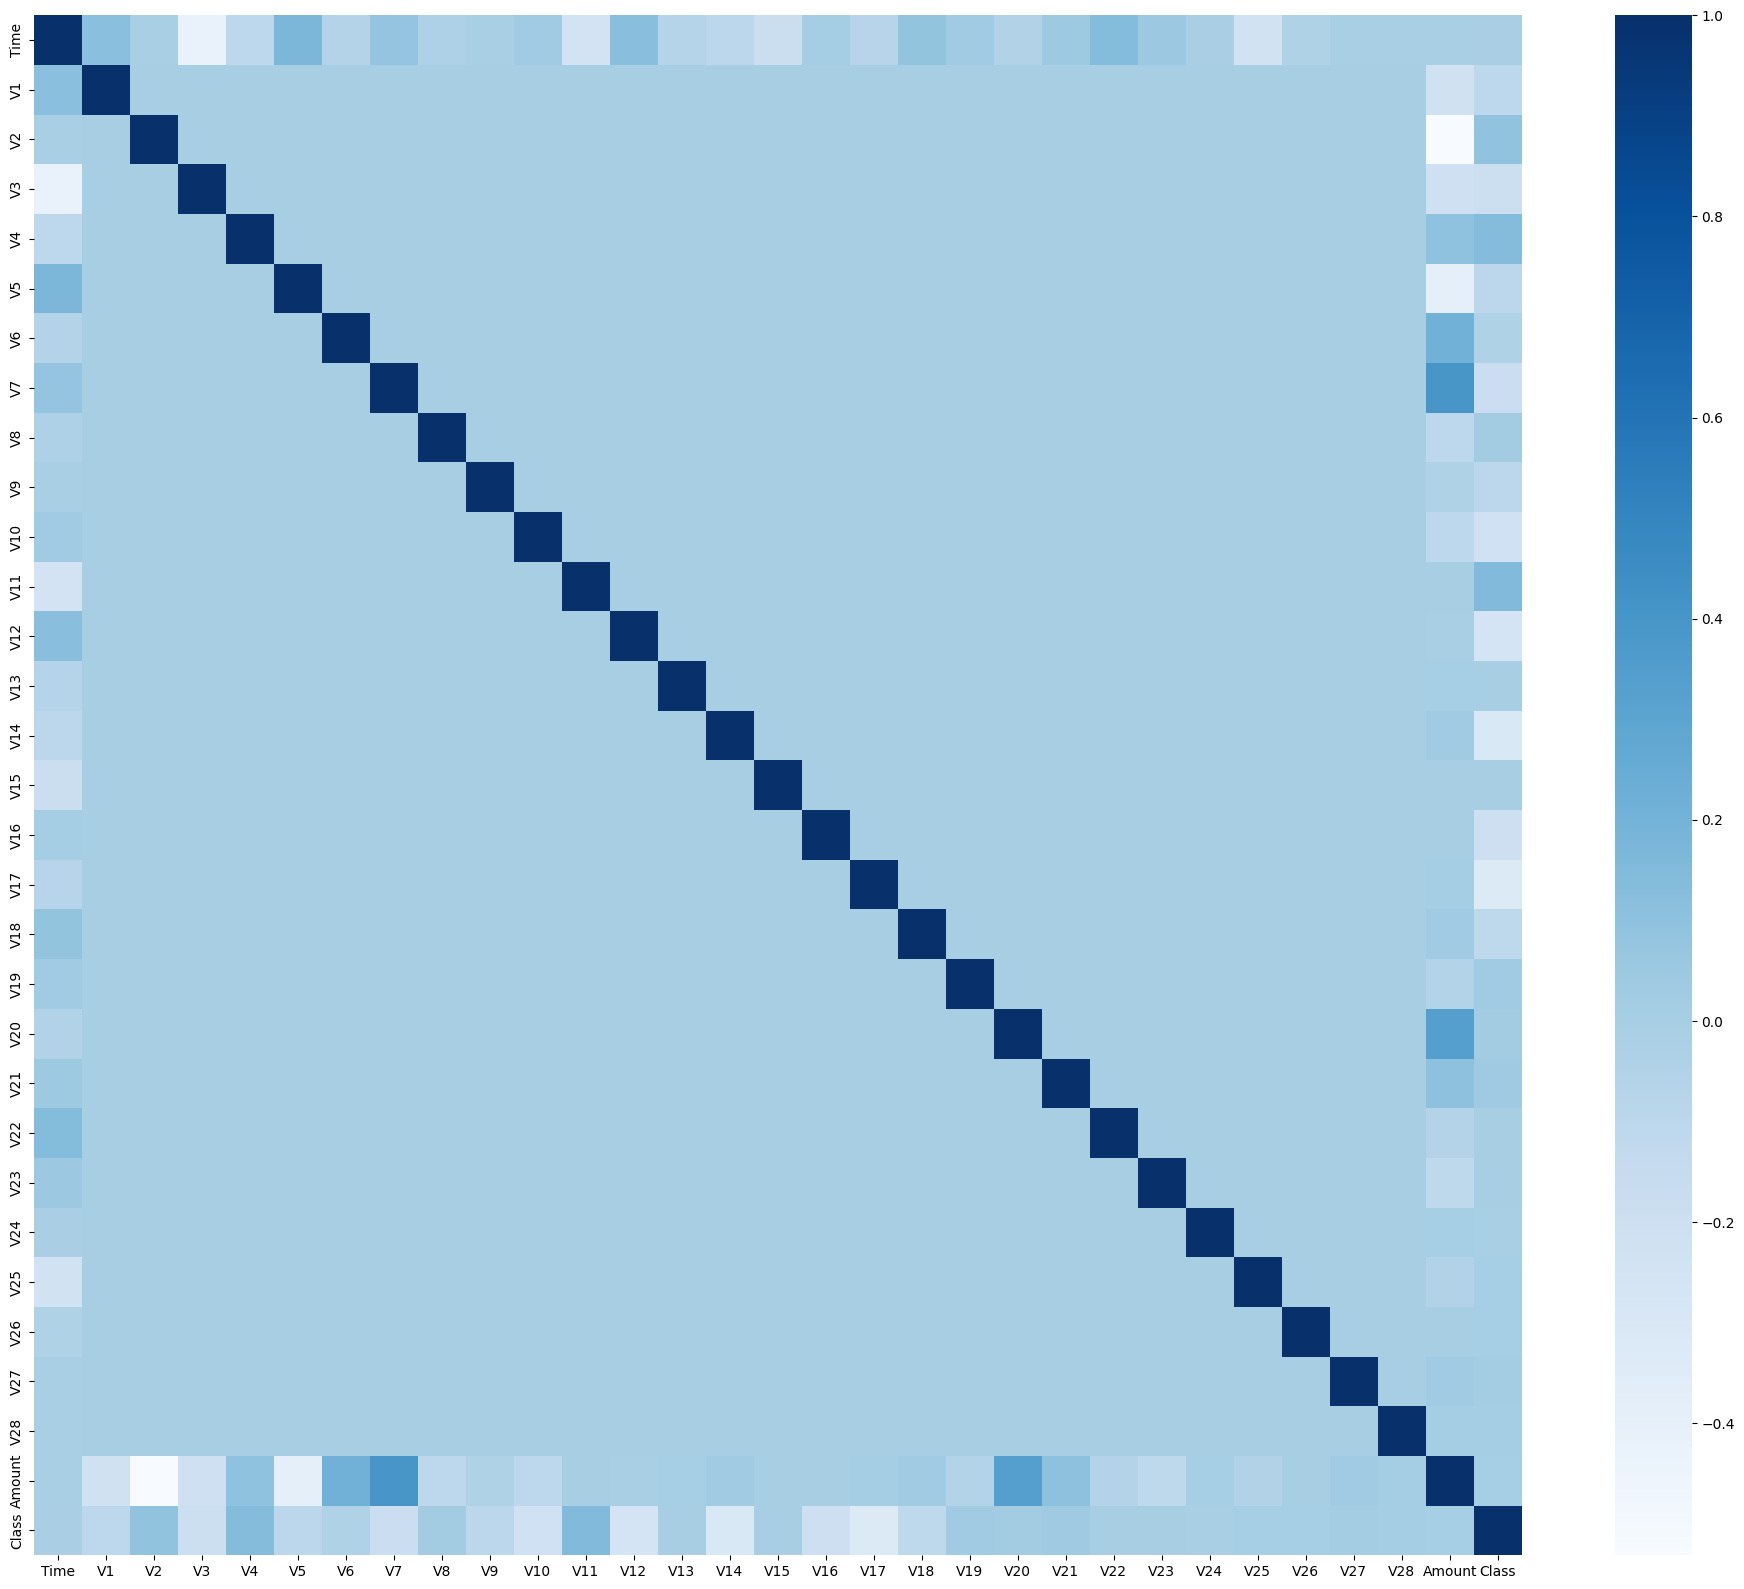

In [100]:
ax = plt.subplots(figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='Blues', annot_kws={'size':20})



#### Correlación Negativa

C:\Users\Manjul\AppData\Local\Temp\ipykernel_11752\2377929740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V17", data=df, palette="Blues", ax=axes[0])
C:\Users\Manjul\AppData\Local\Temp\ipykernel_11752\2377929740.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=df, palette="Blues", ax=axes[1])
C:\Users\Manjul\AppData\Local\Temp\ipykernel_11752\2377929740.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=df, palette="Blues", ax=axes[2])
C:\Users\Manjul\AppData\Local\

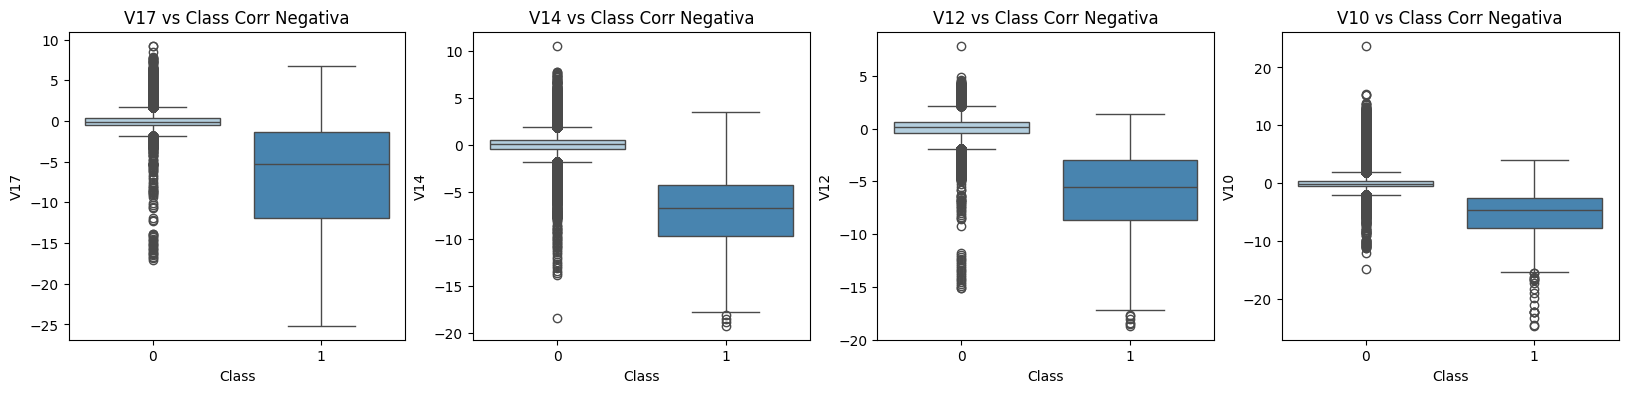

In [98]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df, palette="Blues", ax=axes[0])
axes[0].set_title("V17 vs Class Corr Negativa")

sns.boxplot(x="Class", y="V14", data=df, palette="Blues", ax=axes[1])
axes[1].set_title("V14 vs Class Corr Negativa")


sns.boxplot(x="Class", y="V12", data=df, palette="Blues", ax=axes[2])
axes[2].set_title("V12 vs Class Corr Negativa")


sns.boxplot(x="Class", y="V10", data=df, palette="Blues", ax=axes[3])
axes[3].set_title("V10 vs Class Corr Negativa")

plt.show()

#### Correlación Positiva

C:\Users\Manjul\AppData\Local\Temp\ipykernel_11752\1699918959.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V11", data=df, palette="Blues", ax=axes[0])
C:\Users\Manjul\AppData\Local\Temp\ipykernel_11752\1699918959.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V4", data=df, palette="Blues", ax=axes[1])
C:\Users\Manjul\AppData\Local\Temp\ipykernel_11752\1699918959.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V2", data=df, palette="Blues", ax=axes[2])
C:\Users\Manjul\AppData\Local\Te

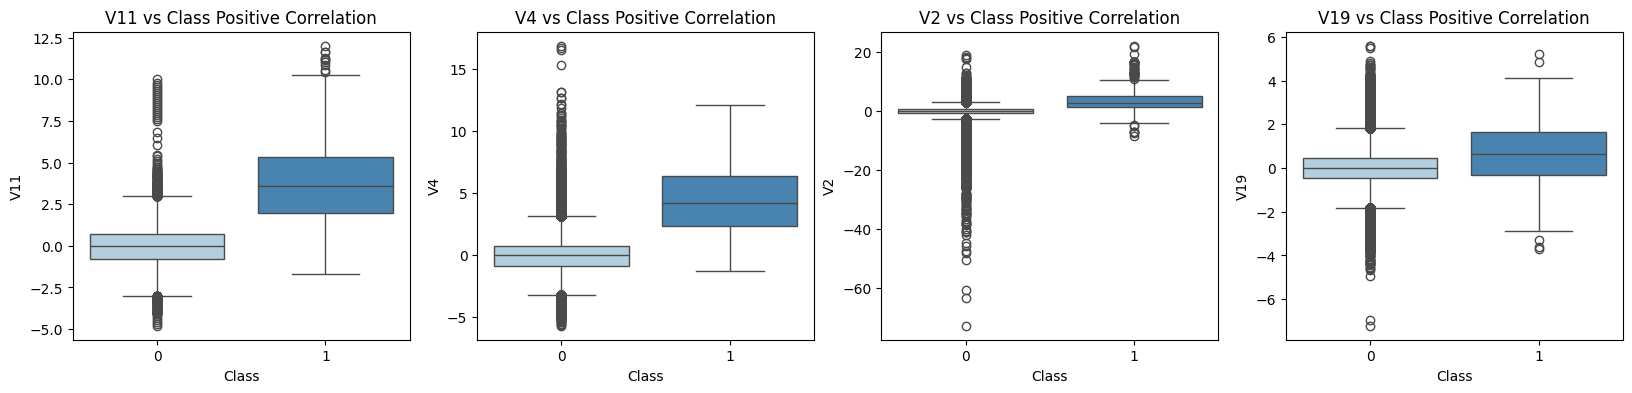

In [97]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=df, palette="Blues", ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df, palette="Blues", ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=df, palette="Blues", ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=df, palette="Blues", ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [101]:
#Divison train
X_train = train_set.drop("Class", axis=1)
y_train = train_set["Class"].copy()
#Division test
X_test = test_set.drop("Class", axis=1)
y_test = test_set["Class"].copy()
#Validacion test
X_val = val_set.drop("Class",axis=1)
y_val = val_set["Class"].copy()

# Evaluacion del Modelo con datos de prueba

In [114]:
# Classifier Libraries
from sklearn.ensemble import RandomForestClassifier
# Instanciar el modelo
# Semilla 42
random_forest_model = RandomForestClassifier(random_state=42)

# Ajuste de modelo usando los datos de entrenamiento
lr_model = random_forest_model.fit(X_train, y_train)

In [115]:
# Prediccion
test_predictions = random_forest_model.predict(X_test)
pd.DataFrame({'Predictions': test_predictions, 'Actual': y_test})


,Predictions,Actual
136058,0,0
221801,0,0
69567,0,0
194393,0,0
178030,0,0
...,...,...
93489,0,0
264238,0,0
205466,0,0
276114,0,0


In [116]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
# Presicion del Modelo con los datos de prueba
print(f"La precision del modelo es de : {balanced_accuracy_score(y_test, test_predictions)}")

La precision del modelo es de : 0.9031642614974199


In [117]:
# Matriz de confusion del modelo
cf_test_matrix = confusion_matrix(y_test, test_predictions)
cf_test_matrix      

array([[56862,     7],
       [   18,    75]], dtype=int64)

In [118]:
# Reporte de clasificacion del modelo
testing_report = classification_report(y_test, test_predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.91      0.81      0.86        93

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# Evaluacion del Modelo con datos de validación

In [119]:
# Prediccion
val_predictions = random_forest_model.predict(X_val)
pd.DataFrame({'Predictions': val_predictions, 'Actual': y_val})

,Predictions,Actual
141022,0,0
126169,0,0
99321,0,0
172616,0,0
79041,0,0
...,...,...
130350,0,0
11007,0,0
125930,0,0
149042,0,0


In [120]:
# Presicion del Modelo con los datos de validacion
print(f"La precision del modelo es de : {balanced_accuracy_score(y_val, val_predictions)}")

La precision del modelo es de : 0.8877023436566298


In [121]:
# Matriz de confusion del modelo
cf_val_matrix = confusion_matrix(y_val, val_predictions)
cf_val_matrix      

array([[56857,     6],
       [   22,    76]], dtype=int64)

In [122]:
# Reporte de clasificacion del modelo
testing_report = classification_report(y_val, val_predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.78      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.89      0.92     56961
weighted avg       1.00      1.00      1.00     56961

